# Final Alternative Features Table

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Getting mobility and test data

In [2]:
# Reading mobility and test data from the original final features table already created
df_original = pd.read_csv('Final_Smooth_Features_Spain.csv')
df_original

,ISO_code,Continent,Country/Region,Date,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Mu Smooth,Beta Smooth,Gamma Smooth,Positive Test Rate Smooth,Mobility Rate Smooth
0,ESP,Europe,Spain,2020-03-21,4.731731e+07,14340.142857,2.470000e+02,719.285714,0.014040,0.193532,0.042238,0.395,-0.528571
1,ESP,Europe,Spain,2020-03-22,4.731431e+07,17042.285714,3.287143e+02,931.142857,0.015943,0.190061,0.032033,0.406,-0.545714
2,ESP,Europe,Spain,2020-03-23,4.731071e+07,20228.000000,4.608571e+02,1212.428571,0.015299,0.186409,0.021829,0.416,-0.555476
3,ESP,Europe,Spain,2020-03-24,4.730669e+07,23708.857143,6.745714e+02,1537.428571,0.017520,0.181782,0.011625,0.427,-0.563095
4,ESP,Europe,Spain,2020-03-25,4.730161e+07,28077.142857,9.607143e+02,1969.428571,0.017607,0.173246,0.001421,0.433,-0.570714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,ESP,Europe,Spain,2022-03-14,3.604191e+07,253374.142857,1.093435e+07,102986.857143,0.000311,0.068976,0.077341,0.173,-0.062619
724,ESP,Europe,Spain,2022-03-15,3.602755e+07,245554.857143,1.095644e+07,103066.428571,0.000243,0.070035,0.077100,0.174,-0.069048
725,ESP,Europe,Spain,2022-03-16,3.601634e+07,236758.285714,1.097639e+07,103127.000000,0.000197,0.077156,0.078181,0.176,-0.075476
726,ESP,Europe,Spain,2022-03-17,3.600835e+07,226561.428571,1.099453e+07,103175.428571,0.000391,0.090718,0.079748,0.177,-0.080476


In [3]:
# Getting the values from 'Date'
dates_original = df_original['Date'].values

# Getting the values of mobility and test rates
mob_smooth = df_original['Positive Test Rate Smooth'].values
test_smooth = df_original['Mobility Rate Smooth'].values

# Getting the values of the epidemiological parameters
mu_smooth = df_original['Mu Smooth'].values
gamma_smooth = df_original['Gamma Smooth'].values
beta_smooth = df_original['Beta Smooth'].values

len(dates_original), len(mob_smooth), len(test_smooth), dates_original[0:5], mob_smooth[0:5], test_smooth[0:5]

(728,
 728,
 728,
 array(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
        '2020-03-25'], dtype=object),
 array([0.395, 0.406, 0.416, 0.427, 0.433]),
 array([-0.52857143, -0.54571429, -0.55547619, -0.56309524, -0.57071429]))

In [4]:
len(mu_smooth), len(gamma_smooth), len(beta_smooth), mu_smooth[0:5], gamma_smooth[0:5], beta_smooth[0:5]

(728,
 728,
 728,
 array([0.0140398 , 0.01594338, 0.01529925, 0.01751999, 0.01760706]),
 array([0.04223751, 0.03203343, 0.02182934, 0.01162526, 0.00142118]),
 array([0.1935318 , 0.19006098, 0.18640881, 0.18178154, 0.1732455 ]))

## 2. Getting daily infected and deaths data

In [5]:
df_daily = pd.read_csv('Daily_Confirmed_Deaths_Spain.csv')
df_daily

,Country/Region,Date,Daily Confirmed,Daily Confirmed Smooth (7 days),Daily Deaths,Daily Deaths Smooth (7 days)
0,Spain,2020-03-21,4964,2711.857143,332,168.571429
1,Spain,2020-03-22,3394,2995.714286,397,211.857143
2,Spain,2020-03-23,6368,3599.142857,539,281.285714
3,Spain,2020-03-24,4749,4019.571429,497,325.000000
4,Spain,2020-03-25,9630,5086.428571,839,432.000000
...,...,...,...,...,...,...
723,Spain,2022-03-14,0,12507.000000,0,80.142857
724,Spain,2022-03-15,36066,14352.285714,281,79.571429
725,Spain,2022-03-16,0,11218.571429,0,60.571429
726,Spain,2022-03-17,0,7987.857143,0,48.428571


In [6]:
# Getting the values from 'Date'
dates_daily = df_daily['Date'].values

# Getting the values of mobility and test rates
inf_smooth = df_daily['Daily Confirmed Smooth (7 days)'].values
deaths_smooth = df_daily['Daily Deaths Smooth (7 days)'].values

len(dates_daily), len(inf_smooth), len(deaths_smooth), dates_daily[0:5], inf_smooth[0:5], deaths_smooth[0:5]

(728,
 728,
 728,
 array(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
        '2020-03-25'], dtype=object),
 array([2711.85714286, 2995.71428571, 3599.14285714, 4019.57142857,
        5086.42857143]),
 array([168.57142857, 211.85714286, 281.28571429, 325.        ,
        432.        ]))

In [7]:
# Check if the 'Date' data from both datasets are equal
print(all(dates_daily == dates_original))

True


Text(0.5, 1.0, 'Daily Confirmed Cases')

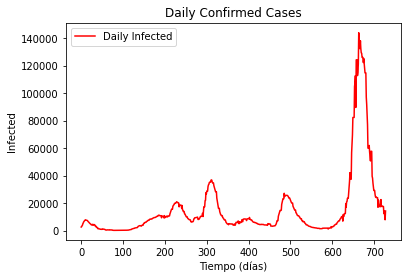

In [8]:
# Daily Confirmed

plt.plot(range(0, len(inf_smooth)), inf_smooth, 'r', label="Daily Infected")
plt.xlabel("Tiempo (días)")
plt.ylabel("Infected")
plt.legend()

plt.title("Daily Confirmed Cases")

Text(0.5, 1.0, 'Daily Confirmed Deaths')

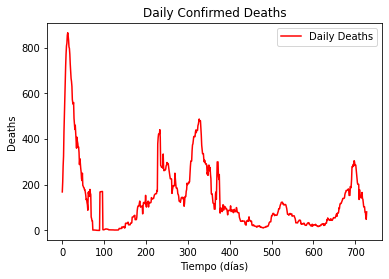

In [9]:
# Daily Deaths

plt.plot(range(0, len(deaths_smooth)), deaths_smooth, 'r', label="Daily Deaths")
plt.xlabel("Tiempo (días)")
plt.ylabel("Deaths")
plt.legend()

plt.title("Daily Confirmed Deaths")

## 3. Getting hospitalization and UCI data

In [10]:
df_hosp = pd.read_csv('Hosp_UCI_Spain.csv')
df_hosp

,Country/Region,Date,Num Hospitalizations,Num Hospitalizations Smooth (7 days),Num UCI,Num UCI Smooth (7 days)
0,Spain,2020-03-21,3495,2826.142857,340,279.000000
1,Spain,2020-03-22,3333,3106.571429,380,309.428571
2,Spain,2020-03-23,4943,3509.571429,448,342.428571
3,Spain,2020-03-24,5307,3920.285714,511,379.714286
4,Spain,2020-03-25,5207,4222.285714,465,401.857143
...,...,...,...,...,...,...
723,Spain,2022-03-14,356,318.142857,19,19.142857
724,Spain,2022-03-15,375,320.857143,19,18.285714
725,Spain,2022-03-16,365,324.857143,12,16.857143
726,Spain,2022-03-17,343,328.285714,17,17.428571


In [11]:
# Getting the values from 'Date'
dates_hosp = df_hosp['Date'].values

# Getting the values of mobility and test rates
hosp_smooth = df_hosp['Num Hospitalizations Smooth (7 days)'].values
UCI_smooth = df_hosp['Num UCI Smooth (7 days)'].values

len(dates_hosp), len(hosp_smooth), len(UCI_smooth), dates_hosp[0:5], hosp_smooth[0:5], UCI_smooth[0:5]

(728,
 728,
 728,
 array(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
        '2020-03-25'], dtype=object),
 array([2826.14285714, 3106.57142857, 3509.57142857, 3920.28571429,
        4222.28571429]),
 array([279.        , 309.42857143, 342.42857143, 379.71428571,
        401.85714286]))

In [12]:
# Check if the 'Date' data from the datasets are equal
print(all(dates_hosp == dates_original))

True


In [13]:
# Region data
region = df_hosp['Country/Region'].values

len(region), region[0:5]

(728, array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain'], dtype=object))

## 4. Final Alternative Features Table Creation

In [14]:
# Array concatenation for building the final dataframe

columns = 11  # Number of columns
X_total = np.empty((len(region), columns), dtype = object)

for i in range(len(region)):
    X_total[i] = [region[i], dates_original[i], inf_smooth[i], deaths_smooth[i], mob_smooth[i], 
                  test_smooth[i], hosp_smooth[i], UCI_smooth[i], beta_smooth[i], gamma_smooth[i], mu_smooth[i]]
    
X_total.shape, X_total[0:10]

((728, 11),
 array([['Spain', '2020-03-21', 2711.8571428571427, 168.57142857142858,
         0.395, -0.5285714285714286, 2826.1428571428573, 279.0,
         0.1935317998669637, 0.0422375080523535, 0.0140397953403922],
        ['Spain', '2020-03-22', 2995.714285714286, 211.8571428571429,
         0.406, -0.5457142857142857, 3106.5714285714284,
         309.42857142857144, 0.190060977549505, 0.0320334264197005,
         0.0159433848749612],
        ['Spain', '2020-03-23', 3599.1428571428573, 281.2857142857143,
         0.416, -0.5554761904761905, 3509.5714285714284,
         342.42857142857144, 0.1864088141528808, 0.0218293447870474,
         0.0152992544742368],
        ['Spain', '2020-03-24', 4019.571428571429, 325.0, 0.427,
         -0.5630952380952381, 3920.285714285714, 379.7142857142857,
         0.1817815366191864, 0.0116252631543943, 0.017519987252307],
        ['Spain', '2020-03-25', 5086.428571428572, 432.0, 0.433,
         -0.5707142857142857, 4222.285714285715, 401.8571428571

In [15]:
# Labels of each column of the dataframe
labels = ['Country/Region', 'Date', 'Daily Confirmed Smooth', 'Daily Deaths Smooth',
          'Positive Test Rate Smooth', 'Mobility Rate Smooth', 'Num Hospitalizations Smooth', 'Num UCI Smooth', 
          'Beta Smooth', 'Gamma Smooth', 'Mu Smooth']

In [16]:
# Creation of the final dataframe
df_final = pd.DataFrame(data=X_total, columns=labels)
df_final

,Country/Region,Date,Daily Confirmed Smooth,Daily Deaths Smooth,Positive Test Rate Smooth,Mobility Rate Smooth,Num Hospitalizations Smooth,Num UCI Smooth,Beta Smooth,Gamma Smooth,Mu Smooth
0,Spain,2020-03-21,2711.857143,168.571429,0.395,-0.528571,2826.142857,279.0,0.193532,0.042238,0.01404
1,Spain,2020-03-22,2995.714286,211.857143,0.406,-0.545714,3106.571429,309.428571,0.190061,0.032033,0.015943
2,Spain,2020-03-23,3599.142857,281.285714,0.416,-0.555476,3509.571429,342.428571,0.186409,0.021829,0.015299
3,Spain,2020-03-24,4019.571429,325.0,0.427,-0.563095,3920.285714,379.714286,0.181782,0.011625,0.01752
4,Spain,2020-03-25,5086.428571,432.0,0.433,-0.570714,4222.285714,401.857143,0.173246,0.001421,0.017607
...,...,...,...,...,...,...,...,...,...,...,...
723,Spain,2022-03-14,12507.0,80.142857,0.173,-0.062619,318.142857,19.142857,0.068976,0.077341,0.000311
724,Spain,2022-03-15,14352.285714,79.571429,0.174,-0.069048,320.857143,18.285714,0.070035,0.0771,0.000243
725,Spain,2022-03-16,11218.571429,60.571429,0.176,-0.075476,324.857143,16.857143,0.077156,0.078181,0.000197
726,Spain,2022-03-17,7987.857143,48.428571,0.177,-0.080476,328.285714,17.428571,0.090718,0.079748,0.000391


In [17]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Final_Smooth_Alternative_Features_Spain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_final.to_csv(filepath, index=False)